# Seasonal cycle

Assessment of model seasonal cycle over the 2000-2019 period.

(Bias corrected data for the period 2000-2019 was produced by training on data from the 1980-1999 period.)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs

sys.path.append('/g/data/xv83/users/at2708/bias_adjustment/evaluation/npcp/results')
import utils

In [2]:
def calc_seas_cyc(da, var):
    """Calculate the monthly climatology"""
    if var == 'pr':
        da_monthly = da.resample(time='1M').sum()
        climatology = da_monthly.groupby('time.month').mean('time')
    else:
        climatology = da.groupby('time.month').mean(dim='time')
    seas_cycle = climatology.mean(dim=["lat", "lon"])

    return seas_cycle 

In [3]:
def get_data(var, rcm):
    """Get data needed for the evaluation"""

    assert rcm in ['BOM-BARPA-R', 'UQ-DES-CCAM-2105']
    
    da_obs = utils.get_npcp_data(
        var,
        'observations',
        'AGCD',
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )   
    da_gcm = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        'GCM',
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    da_rcm_raw = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'raw',
        'task-reference',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    da_rcm_ecdfm = utils.get_npcp_data(
        var,
        'CSIRO-ACCESS-ESM1-5',
        rcm,
        'ecdfm',
        'task-historical',
        '2000-01-01',
        '2019-12-31',
        'AU'
    )
    # TODO: Add additional bias correction methods as data becomes available 

    return da_obs, da_gcm, da_rcm_raw, da_rcm_ecdfm

In [4]:
def plot_mean_bias(ax, da_obs, da_model, var, model_name, ylim):
    """Plot the mean bias for a particular model"""
    
    seas_cycl_obs  = calc_seas_cyc(da_obs, var)
    seas_cycl_model  = calc_seas_cyc(da_model, var)
    bias = seas_cycl_model - seas_cycl_obs
  
    units = 'mm/month' if var == 'pr' else da_model.attrs['units']
    months= ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    ax.plot(np.arange(1, 13), bias, marker='o', linestyle='-', color='k', label='Bias')
    ax.set_title(model_name)
    ax.set_ylim(ylim) 
    ax.set_xticks(np.arange(1, 13, 1))
    month_labels = [month.upper() for month in months]  
    ax.set_xticklabels(month_labels, fontsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel(units, fontsize=14)
    ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

In [5]:
def plot_comparison(var, rcm, ylim):
    """Plot the complete comparison"""

    da_obs, da_gcm, da_rcm_raw, da_rcm_ecdfm = get_data(var, rcm)

    fig = plt.figure(figsize=[24, 6])
    
    # Plot GCM bias
    ax1 = fig.add_subplot(131)
    plot_mean_bias(ax1, da_obs, da_gcm, var, 'CSIRO-ACCESS-ESM1-5', ylim)
    ax1.set_title(f'CSIRO-ACCESS-ESM1-5', fontsize=16)

    # Plot RCM raw bias
    ax2 = fig.add_subplot(132)
    plot_mean_bias(ax2, da_obs, da_rcm_raw, var, f'{rcm} (raw)', ylim)
    ax2.set_title(f'{rcm} (raw)', fontsize=16)

    # Plot RCM bias corrected bias
    ax3 = fig.add_subplot(133)
    plot_mean_bias(ax3, da_obs, da_rcm_ecdfm, var, f'{rcm} (ecdfm)', ylim)
    ax3.set_title(f'{rcm} (ecdfm)', fontsize=16)
    
    long_name = da_rcm_raw.attrs['long_name']
    plt.suptitle(f' Seasonal cycle bias (model minus obs) in the 2000-2019 {long_name}', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


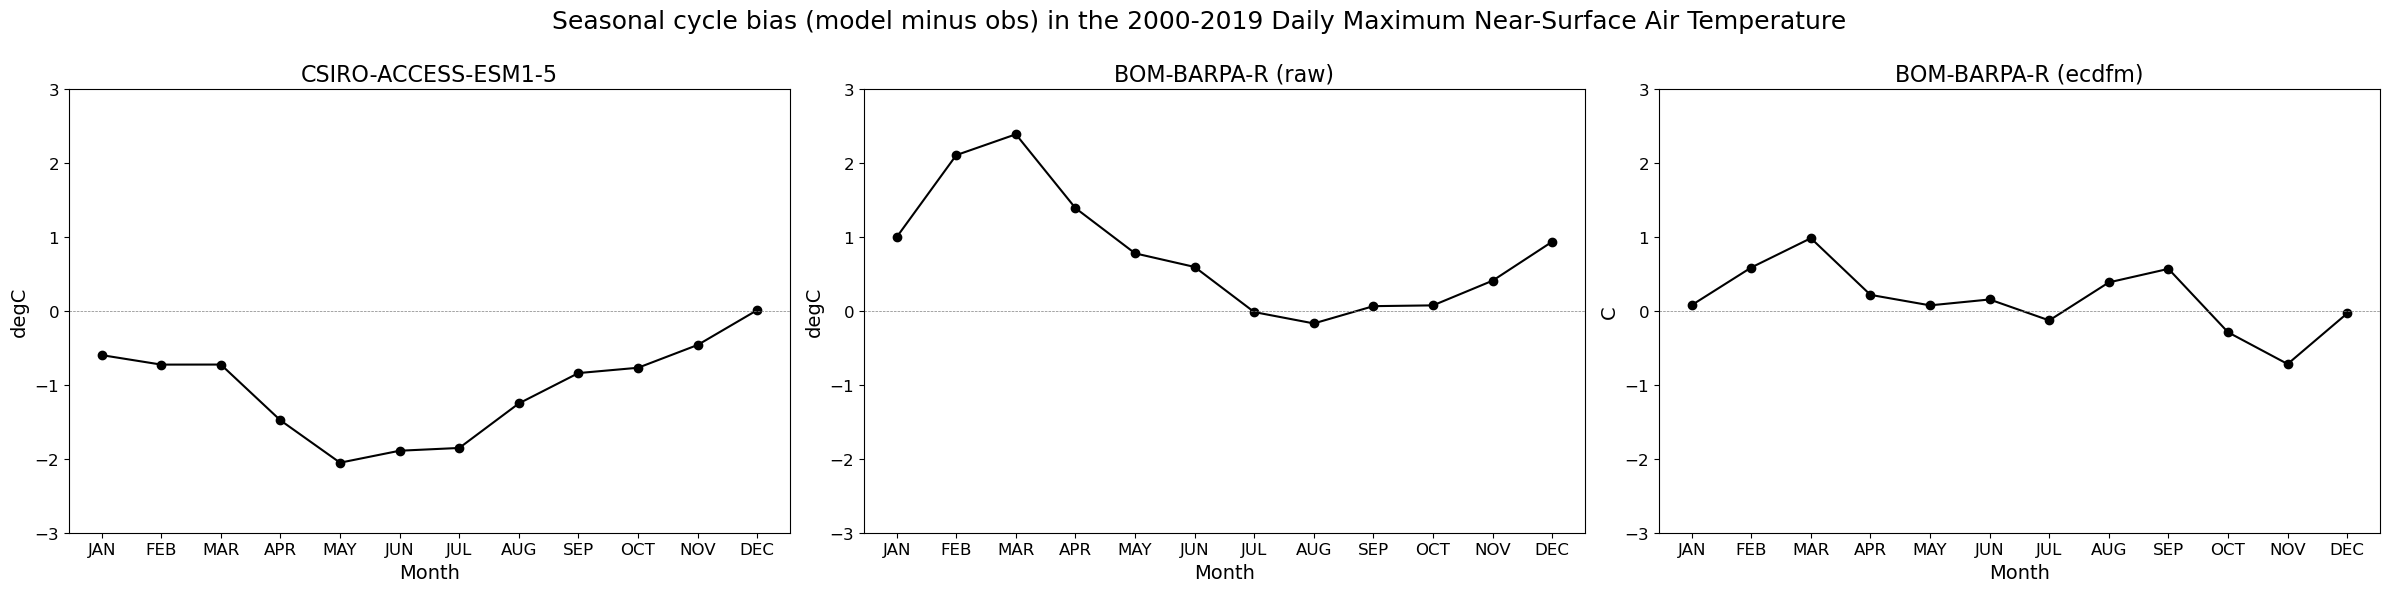

In [6]:
plot_comparison('tasmax', 'BOM-BARPA-R', ylim=(-3,3))

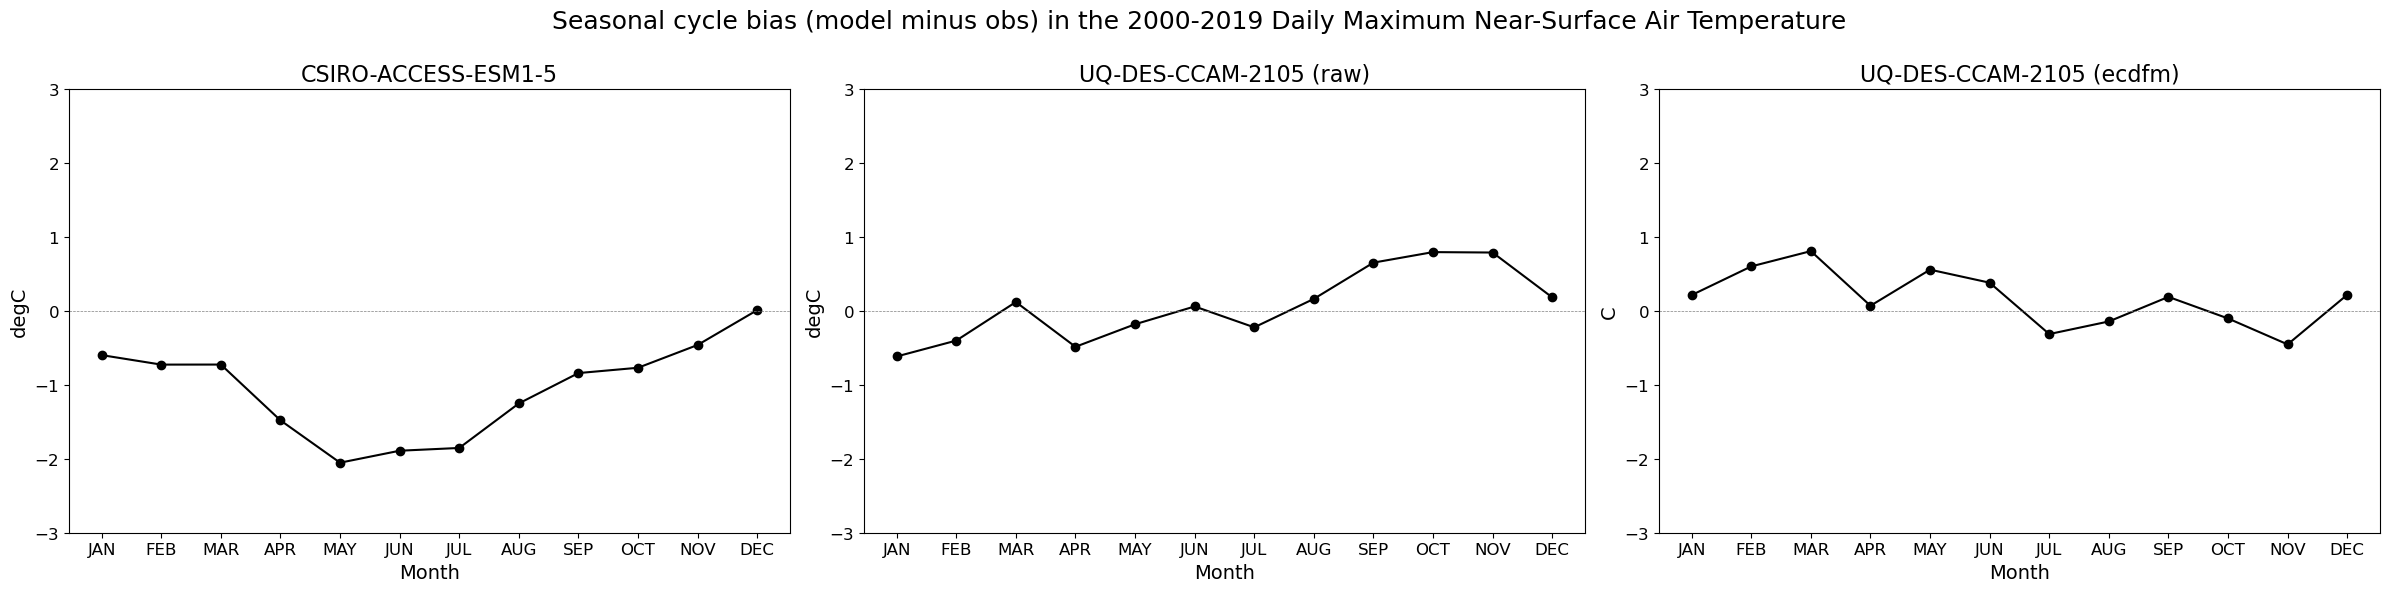

In [7]:
plot_comparison('tasmax', 'UQ-DES-CCAM-2105', ylim=(-3,3))

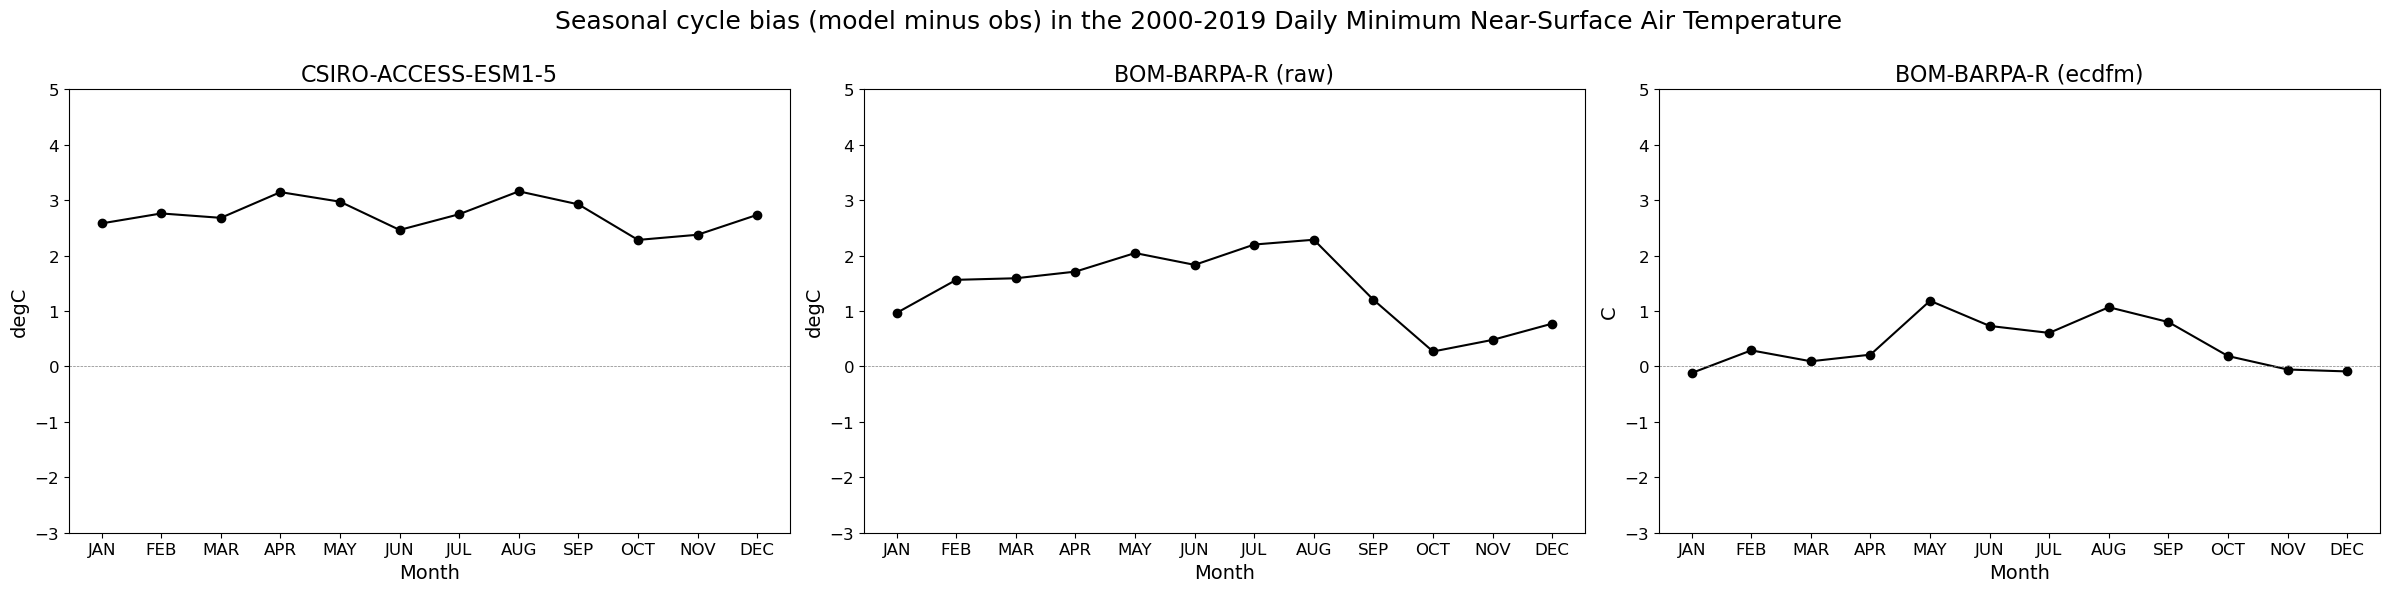

In [8]:
plot_comparison('tasmin', 'BOM-BARPA-R', ylim=(-3,5))

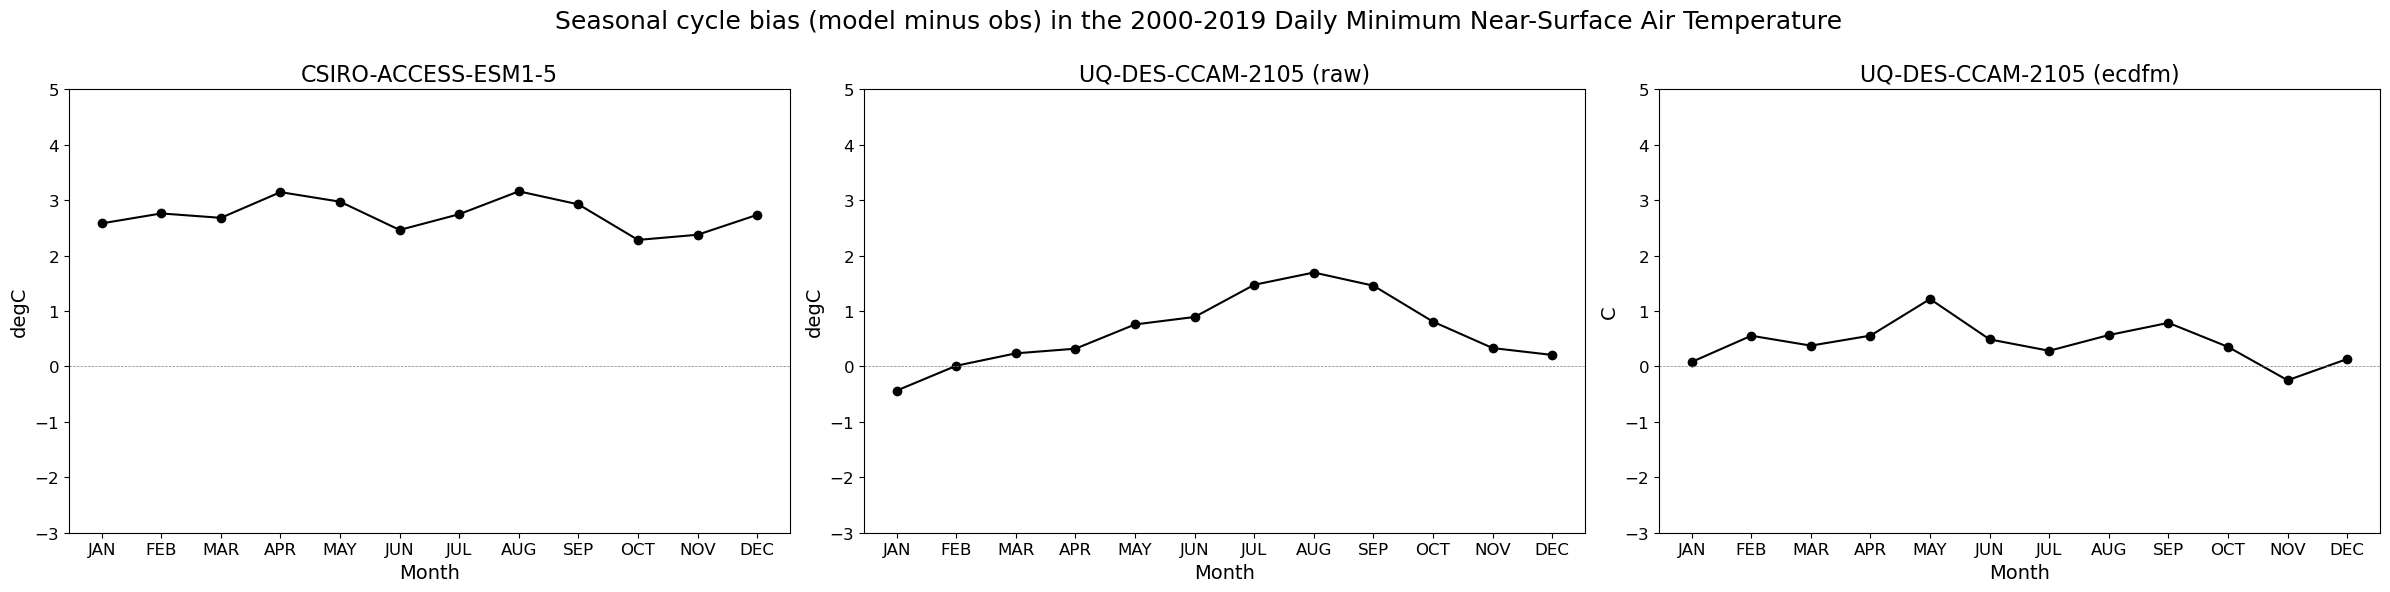

In [9]:
plot_comparison('tasmin', 'UQ-DES-CCAM-2105', ylim=(-3,5))

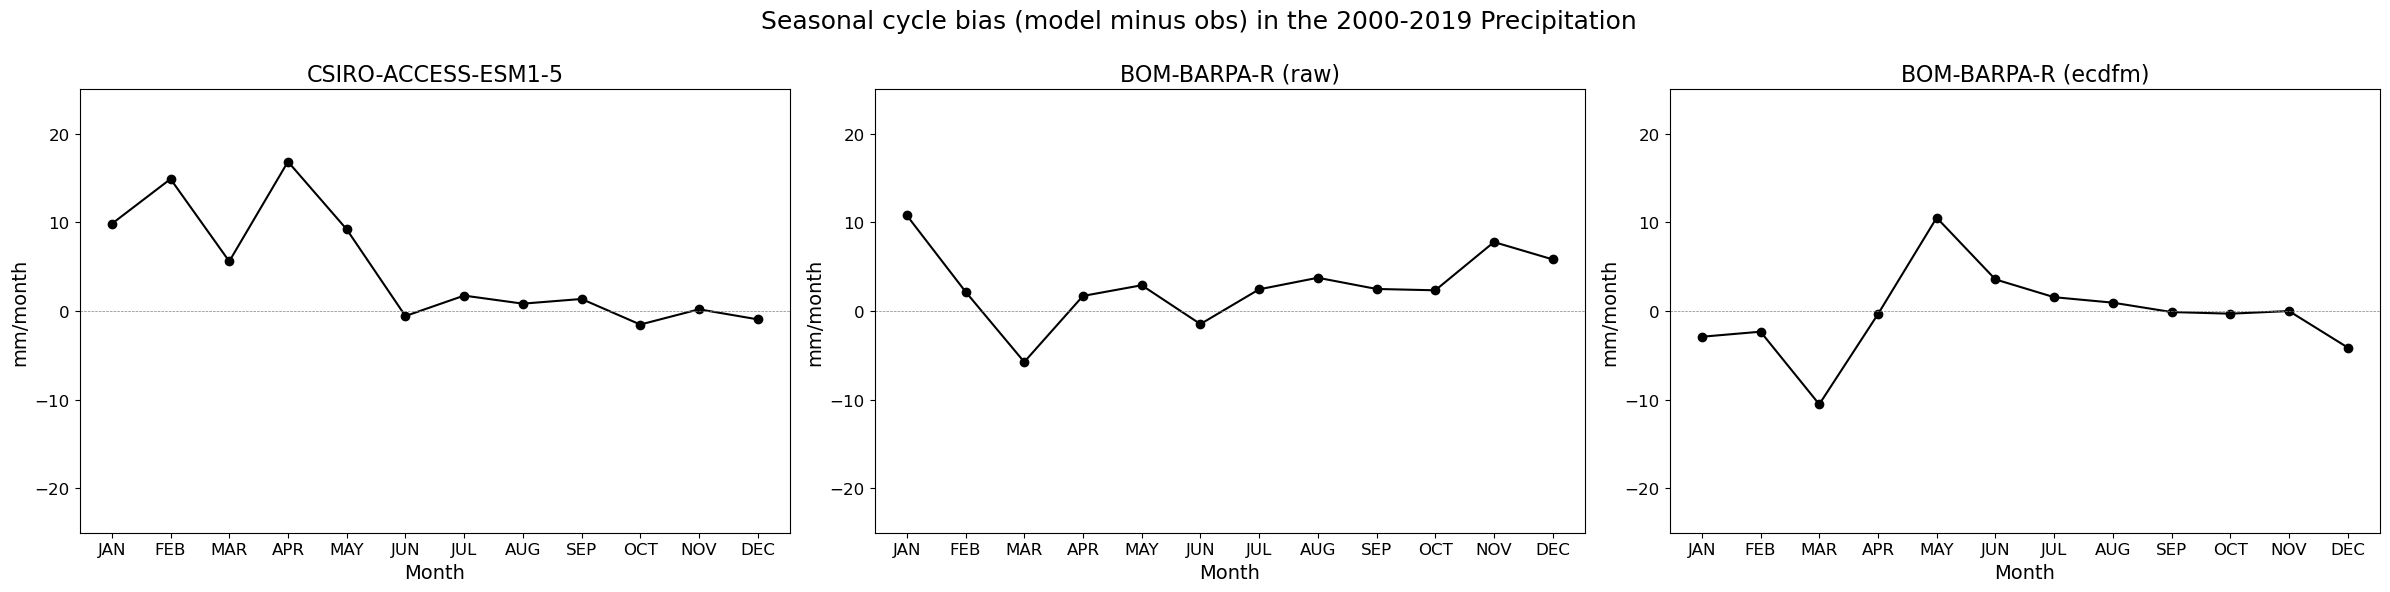

In [12]:
plot_comparison('pr', 'BOM-BARPA-R', ylim=(-25,25))

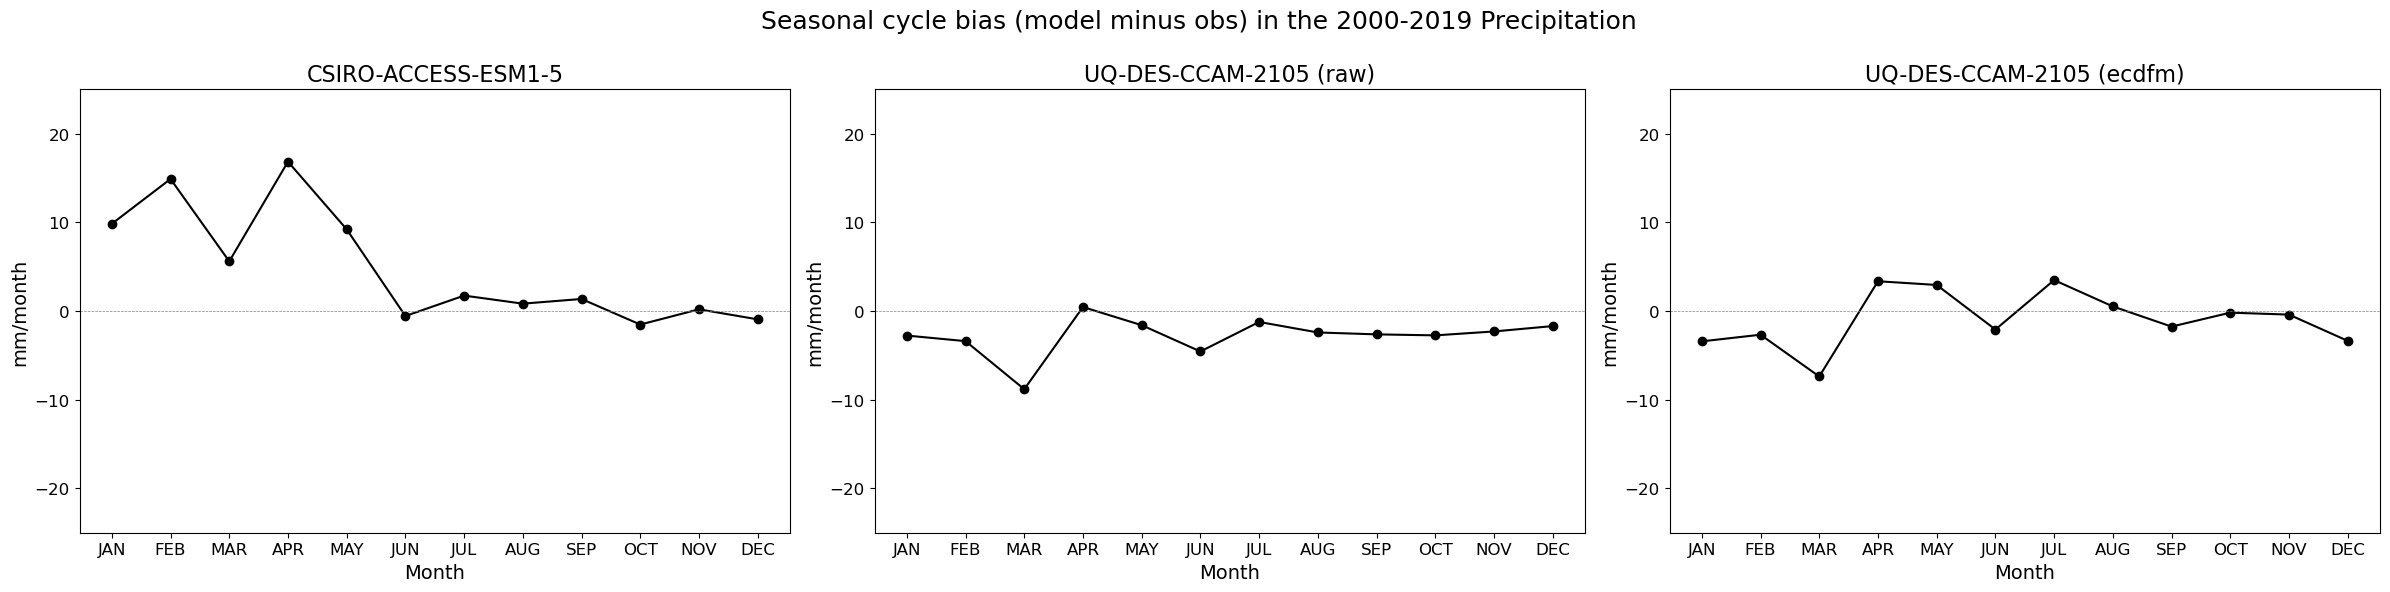

In [13]:
plot_comparison('pr', 'UQ-DES-CCAM-2105', ylim=(-25,25))